In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Carat:Carat weight of the cubic zirconia. Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,Premium,Ideal. Color: Colour of the cubic zirconia.With D being the best and J the worst. Clarity :cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter. Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. Price : the Price of the cubic zirconia. X : Length of the cubic zirconia in mm. Y : Width of the cubic zirconia in mm. Z : Height of the cubic zirconia in mm.

```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [ ]:
#Diamond with 0 dimension is not possible
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

Handling Duplicates

In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

Handling Null Values

In [ ]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [ ]:
df.fillna(df.median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Outlier Treatment

In [ ]:
shape_of_df_before_ot=df.shape
print(shape_of_df_before_ot)

(26925, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


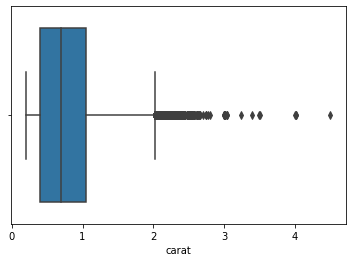

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


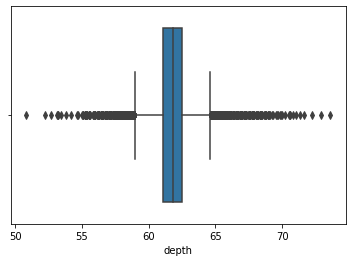

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


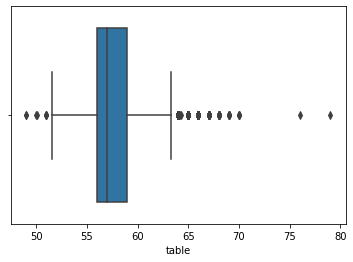

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


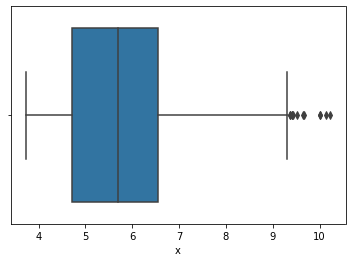

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


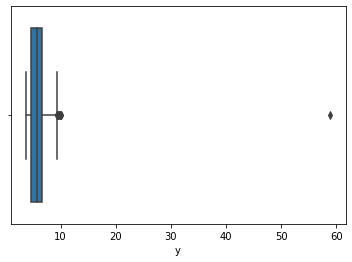

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


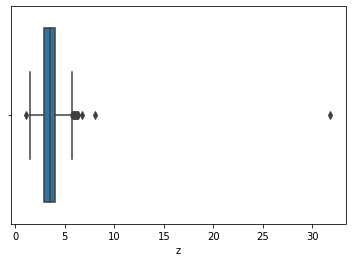

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


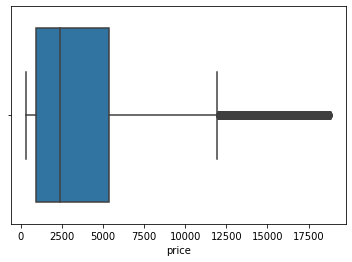

In [ ]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [ ]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    print(IQR)
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)

    return lower_range, upper_range

In [ ]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df.drop(df[ (df[column] > ur) | (df[column] < lr) ].index , inplace=True)

0.65
1.3999999999999986
3.0
1.83
1.8200000000000003
1.13
4174.0


In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,23393.000000,23393.000000,23393.000000,23393.000000,23393.000000,23393.000000,23393.000000
mean,0.701858,61.798093,57.237315,5.528048,5.532906,3.417601,3033.254649
std,0.368871,1.056999,2.008285,0.976631,0.970440,0.604797,2665.031080
min,0.200000,59.000000,52.000000,3.730000,3.710000,1.530000,326.000000
25%,0.370000,61.200000,56.000000,4.620000,4.630000,2.840000,879.000000
50%,0.590000,61.800000,57.000000,5.390000,5.400000,3.320000,1987.000000
75%,1.010000,62.500000,59.000000,6.400000,6.400000,3.970000,4578.000000
max,2.020000,64.600000,63.300000,8.280000,8.270000,5.210000,11333.000000


In [ ]:
shape_of_df_after_ot=df.shape
print(shape_of_df_after_ot)

(23393, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


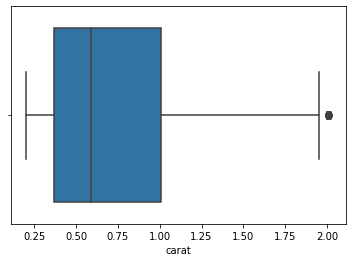

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


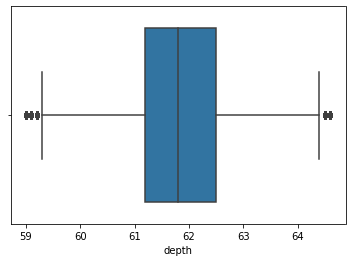

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


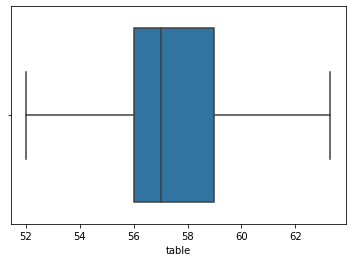

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


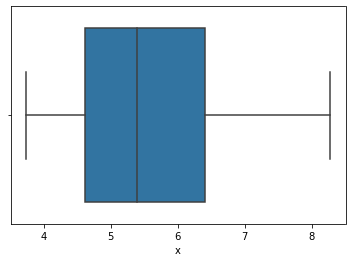

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


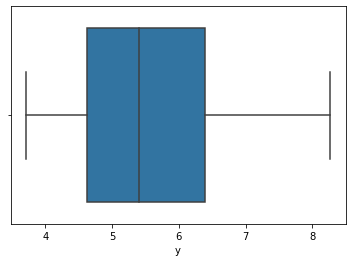

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


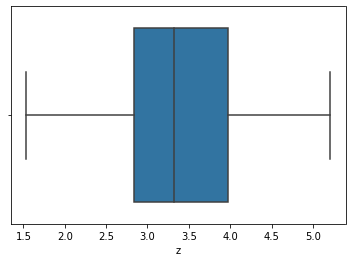

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


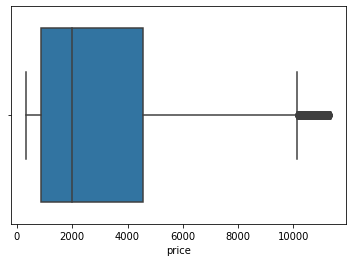

In [ ]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

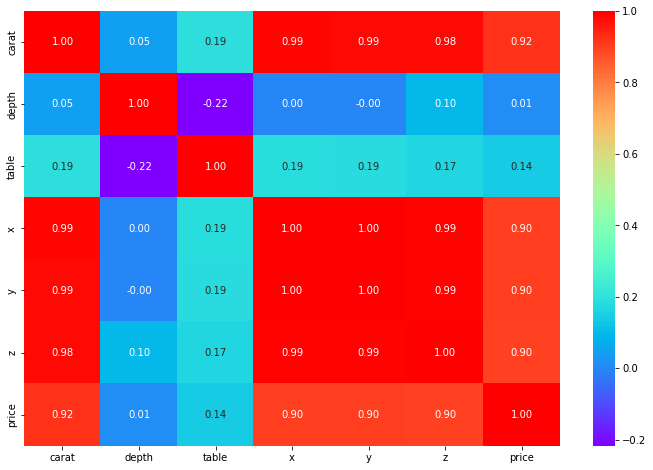

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

In [ ]:
df.drop(['x','y','z'],axis=1,inplace=True)

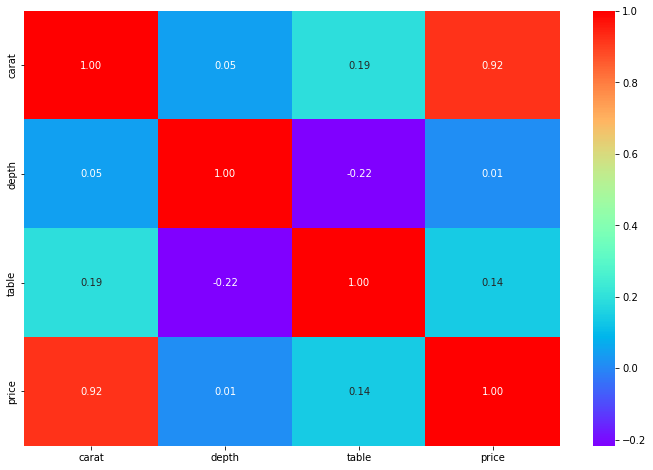

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [ ]:
df['color'].value_counts()

G    4968
E    4402
F    4146
H    3482
D    3000
I    2264
J    1131
Name: color, dtype: int64

In [ ]:
df['clarity'].value_counts()

SI1     5710
VS2     5344
VS1     3641
SI2     3621
VVS2    2297
VVS1    1718
IF       817
I1       245
Name: clarity, dtype: int64

Ordinal Encoding

In [ ]:
scale_mapper_cut = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df["cut"] = df["cut"].replace(scale_mapper_cut)

In [ ]:
df['cut'].value_counts()

4    10116
3     5927
2     5368
1     1839
0      143
Name: cut, dtype: int64

In [ ]:
scale_mapper_clarity = {'FL':10,'IF':9,'VVS1':8,'VVS2':7,'VS1':6,'VS2':5,'SI1':4,'SI2':3,'I1':2, 'I2':1, 'I3':0}
df["clarity"] = df["clarity"].replace(scale_mapper_clarity)

In [ ]:
df['clarity'].value_counts()

4    5710
5    5344
6    3641
3    3621
7    2297
8    1718
9     817
2     245
Name: clarity, dtype: int64

One Hot Encoding

In [ ]:
df=pd.get_dummies(df,columns=['color'],drop_first=True)
df.head()

,carat,cut,clarity,depth,table,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,4,62.1,58.0,499,1,0,0,0,0,0
1,0.33,3,9,60.8,58.0,984,0,0,1,0,0,0
2,0.90,2,7,62.2,60.0,6289,1,0,0,0,0,0
3,0.42,4,6,61.6,56.0,1082,0,1,0,0,0,0
4,0.31,4,8,60.4,59.0,779,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

Linear Regression

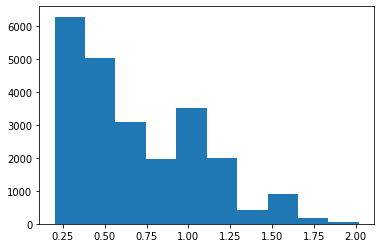

carat


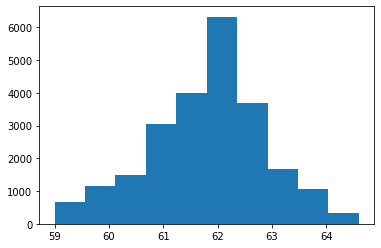

depth


In [ ]:
columns=['carat','depth']
for col in columns:
    plt.hist(df[col])
    plt.show()
    print(col)

In [ ]:
df2=df.copy()
for col in columns:
  df2[col]=np.log2(df2[col])

In [ ]:
X_df2 = df2.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y_df2 = df2[['price']]

In [ ]:
X_train_df2, X_test_df2, Y_train_df2, Y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=2)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_df2)
X_test_scaled=scaler.transform(X_test_df2)

In [ ]:
X_train_scaled

array([[-0.32878233,  0.95970568,  0.52286617, ..., -0.41901832,
        -0.32722355, -0.22319247],
       [-1.22334548,  0.95970568, -0.69129408, ...,  2.38653048,
        -0.32722355, -0.22319247],
       [ 1.10794031,  0.95970568, -1.29837421, ...,  2.38653048,
        -0.32722355, -0.22319247],
       ...,
       [-0.4643222 , -0.02596646, -0.69129408, ..., -0.41901832,
        -0.32722355, -0.22319247],
       [ 2.16515132, -0.02596646, -1.90545433, ..., -0.41901832,
        -0.32722355, -0.22319247],
       [ 0.32180906, -0.02596646, -0.08421396, ..., -0.41901832,
         3.05601481, -0.22319247]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, Y_train_df2)
y_pred_reg=regression_model.predict(X_test_scaled)
y_pred_reg = np.array(y_pred_reg)
r2_score(y_pred_reg,Y_test_df2)*100

90.78248272878892

In [ ]:
#RMSE
np.sqrt(mean_squared_error(Y_test_df2,y_pred_reg))

772.7855062732274

In [ ]:
mean_absolute_error(Y_test_df2,y_pred_reg)

566.9712320303715

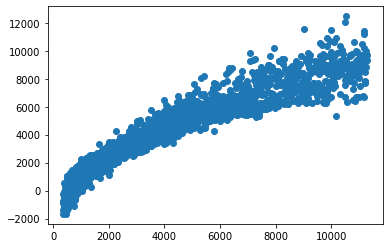

In [ ]:
plt.scatter(Y_test_df2['price'], y_pred_reg)

Decision Tree

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df[['price']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

# Train Decision Tree Classifer
model_dt.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)
print(y_pred_dt)
y_pred_dt = np.array(y_pred_dt)
print(Y_test)
r2_score(y_pred_dt,Y_test)*100

[ 630.5  764.  5319.  ...  991.  3018.   780. ]
       price
580      552
26028    764
3428    5223
13554   1781
12584   1642
...      ...
21132   3754
18688    926
16426    951
21396   2723
6399     885

[4679 rows x 1 columns]


95.9669318952727

In [ ]:
mean_absolute_error(Y_test,y_pred_dt)

295.88736909596065

Hyperparameter tuning Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
params_dt = {
    'max_depth': [2, 3, 5, 6,7,8,9,10,12,15,17,20,30,50,100],
    'min_samples_leaf': [5, 10,15,20,25,30,40,45, 50, 100],
}
grid_search_dt = GridSearchCV(estimator=model_dt,
                           param_grid=params_dt,
                           cv=4, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train,Y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-8c3e4e909620>", line 9, in <module>
    grid_search_dt.fit(X_train,Y_train)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 851, in evaluate_candidates
    enumerate(candidate_params), enumerate(cv.split(X, y, groups))
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935, in retrieve
    self._

KeyboardInterrupt: ignored

In [ ]:
dt_best = grid_search_dt.best_estimator_
dt_best

In [ ]:
y_pred_dt_hpt=dt_best.predict(X_test)
y_pred_dt_hpt = np.array(y_pred_dt_hpt)
r2_score(y_pred_dt_hpt,Y_test)*100

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fit the regressor with x and y data
model_rf.fit(X_train,Y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_rf = np.array(y_pred_rf)
r2_score(y_pred_rf,Y_test)*100

Hyperparameter Tuning Random Forest

In [ ]:
params_rf = {'n_estimators': [1,5,10,20],
               'max_depth': [5,10,20,50],
               'min_samples_leaf': [5, 10,15,20],
               'bootstrap': [True, False]}
grid_search_rf = GridSearchCV(estimator=model_rf,
                           param_grid=params_rf,
                           cv=4, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train,Y_train)

In [ ]:
rf_best = grid_search_rf.best_estimator_
rf_best

In [ ]:
y_pred_rf_hpt=rf_best.predict(X_test)
y_pred_rf_hpt = np.array(y_pred_rf_hpt)
r2_score(y_pred_rf_hpt,Y_test)*100

SVM

In [ ]:
from sklearn.svm import SVR
model_svm=SVR(kernel="linear")
model_svm.fit(X_train,Y_train)
y_pred_svm = model_svm.predict(X_test)
y_pred_svm = np.array(y_pred_svm)
r2_score(y_pred_svm,Y_test)*100

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred_nb = gnb.predict(X_test)
y_pred_nb=np.array(y_pred_nb)
r2_score(y_pred_nb,Y_test)*100

XGBoost

In [ ]:
from xgboost import XGBRegressor
XGB_REG = XGBRegressor(gamma=0.9, max_depth=7, n_estimators=150,
             objective='reg:squarederror', random_state=1, reg_alpha=1.1,
             reg_lambda=0.9,learning_rate=0.1)
XGB_REG.fit(X_train,Y_train)

In [ ]:
y_pred_xgb = XGB_REG.predict(X_test)
y_pred_xgb = np.array(y_pred_xgb)
test_y = np.array(Y_test)
r2_score(y_pred_xgb,Y_test)*100

Hyper Parameter Tuning XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={
    "learning_rate":[0.05,0.1,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,7,8,9,10,13,15,18,20],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
}
model = XGBRegressor(random_state=23)
random_search=RandomizedSearchCV(model,param_distributions=params, cv=5,n_iter=15,verbose=5,n_jobs=12)
random_search.fit(X_train,Y_train)

In [ ]:
random_search_best_params=random_search.best_estimator_
random_search_best_params

In [ ]:
y_pred_xgb_hpt=random_search_best_params.predict(X_test)
y_pred_xgb_hpt = np.array(y_pred_xgb_hpt)
r2_score(y_pred_xgb_hpt,Y_test)*100